In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import nltk
import timestring
import datetime

In [2]:
stockdata = pd.read_csv("AprilData.csv", sep = ",")
newsdata = pd.read_csv("allnews.csv", sep=",")
newsdata.head()

,newsdate,companyname,title,content,url
0,"May 02, 2019 09:03 am +08",TM,Valuation needed for new houses — experts,KUALA LUMPUR: House buyers stand to benefit if...,https://www.theedgemarkets.com/article/valuati...
1,"April 29, 2019 17:17 pm +08",TM,TM One unveils new Cyberjaya data centre,CYBERJAYA (April 29): Telekom Malaysia Bhd’s (...,https://www.theedgemarkets.com/article/tm-one-...
2,"April 29, 2019 12:30 pm +08",TM,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...
3,"April 25, 2019 10:51 am +08",TM,"Gurney Plaza, ECM help mitigate CMMT’s lower e...","CapitaLand Malaysia Mall Trust\n(April 24, RM1...",https://www.theedgemarkets.com/article/gurney-...
4,"April 23, 2019 01:08 am +08",TM,Internet connectivity to be listed as utility ...,KUALA LUMPUR (April 22): The Communications an...,https://www.theedgemarkets.com/article/interne...


In [3]:
stockdata.drop(["Id","created_at"], axis=1, inplace=True)
stockdata.head()

,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
0,2019-04-01 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.350,0.350,20000
1,2019-04-02 16:00:00,main_market,healthcare,ADVENTA,7191,0.350,0.350,0.350,0.350,1000
2,2019-04-03 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.355,0.355,5000
3,2019-04-04 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.350,0.350,32000
4,2019-04-07 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.350,0.350,31600


In [4]:
newsdata["newsdate"]= newsdata["newsdate"].apply(lambda x:timestring.Date(x).date)
newsdata["newsdate"] = newsdata["newsdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
newsdata.head()

,newsdate,companyname,title,content,url
0,2019-05-02,TM,Valuation needed for new houses — experts,KUALA LUMPUR: House buyers stand to benefit if...,https://www.theedgemarkets.com/article/valuati...
1,2019-04-29,TM,TM One unveils new Cyberjaya data centre,CYBERJAYA (April 29): Telekom Malaysia Bhd’s (...,https://www.theedgemarkets.com/article/tm-one-...
2,2019-04-29,TM,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...
3,2019-04-25,TM,"Gurney Plaza, ECM help mitigate CMMT’s lower e...","CapitaLand Malaysia Mall Trust\n(April 24, RM1...",https://www.theedgemarkets.com/article/gurney-...
4,2019-04-23,TM,Internet connectivity to be listed as utility ...,KUALA LUMPUR (April 22): The Communications an...,https://www.theedgemarkets.com/article/interne...


In [5]:
newsdata["titlepolarity"] = [TextBlob(newsdata["title"].iloc[i]).polarity for i in range(0,newsdata.shape[0])]
newsdata["contentpolarity"] = [TextBlob(newsdata["content"].iloc[i]).polarity for i in range(0,newsdata.shape[0])]
newsdata.head()

,newsdate,companyname,title,content,url,titlepolarity,contentpolarity
0,2019-05-02,TM,Valuation needed for new houses — experts,KUALA LUMPUR: House buyers stand to benefit if...,https://www.theedgemarkets.com/article/valuati...,0.136364,0.096433
1,2019-04-29,TM,TM One unveils new Cyberjaya data centre,CYBERJAYA (April 29): Telekom Malaysia Bhd’s (...,https://www.theedgemarkets.com/article/tm-one-...,0.136364,0.072397
2,2019-04-29,TM,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,0.000000,-0.020236
3,2019-04-25,TM,"Gurney Plaza, ECM help mitigate CMMT’s lower e...","CapitaLand Malaysia Mall Trust\n(April 24, RM1...",https://www.theedgemarkets.com/article/gurney-...,0.000000,-0.010095
4,2019-04-23,TM,Internet connectivity to be listed as utility ...,KUALA LUMPUR (April 22): The Communications an...,https://www.theedgemarkets.com/article/interne...,0.000000,0.125055


In [6]:
newsdata['totalpolarity'] = newsdata[['titlepolarity','contentpolarity']].sum(axis=1)
newsdata.head()

,newsdate,companyname,title,content,url,titlepolarity,contentpolarity,totalpolarity
0,2019-05-02,TM,Valuation needed for new houses — experts,KUALA LUMPUR: House buyers stand to benefit if...,https://www.theedgemarkets.com/article/valuati...,0.136364,0.096433,0.232796
1,2019-04-29,TM,TM One unveils new Cyberjaya data centre,CYBERJAYA (April 29): Telekom Malaysia Bhd’s (...,https://www.theedgemarkets.com/article/tm-one-...,0.136364,0.072397,0.208760
2,2019-04-29,TM,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,0.000000,-0.020236,-0.020236
3,2019-04-25,TM,"Gurney Plaza, ECM help mitigate CMMT’s lower e...","CapitaLand Malaysia Mall Trust\n(April 24, RM1...",https://www.theedgemarkets.com/article/gurney-...,0.000000,-0.010095,-0.010095
4,2019-04-23,TM,Internet connectivity to be listed as utility ...,KUALA LUMPUR (April 22): The Communications an...,https://www.theedgemarkets.com/article/interne...,0.000000,0.125055,0.125055


In [7]:
TMNEWS = newsdata

In [8]:
TMNEWS = TMNEWS.iloc[np.where(newsdata["companyname"]=="TM")]
TMNEWS

,newsdate,companyname,title,content,url,titlepolarity,contentpolarity,totalpolarity
0,2019-05-02,TM,Valuation needed for new houses — experts,KUALA LUMPUR: House buyers stand to benefit if...,https://www.theedgemarkets.com/article/valuati...,0.136364,0.096433,0.232796
1,2019-04-29,TM,TM One unveils new Cyberjaya data centre,CYBERJAYA (April 29): Telekom Malaysia Bhd’s (...,https://www.theedgemarkets.com/article/tm-one-...,0.136364,0.072397,0.208760
2,2019-04-29,TM,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,0.000000,-0.020236,-0.020236
3,2019-04-25,TM,"Gurney Plaza, ECM help mitigate CMMT’s lower e...","CapitaLand Malaysia Mall Trust\n(April 24, RM1...",https://www.theedgemarkets.com/article/gurney-...,0.000000,-0.010095,-0.010095
4,2019-04-23,TM,Internet connectivity to be listed as utility ...,KUALA LUMPUR (April 22): The Communications an...,https://www.theedgemarkets.com/article/interne...,0.000000,0.125055,0.125055
5,2019-04-20,TM,"Maybank, Petronas Dagangan, TM, UEM Sunrise, K...",KUALA LUMPUR (April 19): Based on corporate a...,https://www.theedgemarkets.com/article/maybank...,0.000000,0.052615,0.052615
6,2019-04-19,TM,PetDagang partners TM One for digital upgrade ...,KUALA LUMPUR (April 19): Petronas Dagangan Bhd...,https://www.theedgemarkets.com/article/petdaga...,0.000000,0.173679,0.173679
7,2019-04-18,TM,TM says 5G a new growth area,"KUALA LUMPUR: Telekom Malaysia Bhd (TM), which...",https://www.theedgemarkets.com/article/tm-says...,0.136364,0.091558,0.227922
8,2019-04-17,TM,"TM views 5G tech rollout as growth area, still...",PUTRAJAYA (April 17): Telekom Malaysia Bhd (TM...,https://www.theedgemarkets.com/article/tm-view...,0.000000,0.136395,0.136395
9,2019-04-15,TM,When defensive stocks are no longer a bear-mar...,KUALA LUMPUR: Defensive stocks such as utiliti...,https://www.theedgemarkets.com/article/when-de...,0.500000,0.092833,0.592833


In [9]:
TMNEWS.index = pd.to_datetime(TMNEWS["newsdate"])
TMNEWS = TMNEWS.loc["2019-04-30":"2019-04-01"].resample("B").sum()
TMNEWS

,titlepolarity,contentpolarity,totalpolarity
newsdate,,,
2019-04-02,0.350000,0.084179,0.434179
2019-04-03,0.350000,0.126462,0.476462
2019-04-04,0.136364,-0.000589,0.135774
2019-04-05,0.000000,0.000000,0.000000
2019-04-08,0.000000,0.000000,0.000000
2019-04-09,0.000000,0.000000,0.000000
2019-04-10,0.000000,0.000000,0.000000
2019-04-11,-0.125000,-0.018269,-0.143269
2019-04-12,0.000000,0.000000,0.000000


In [10]:
TMstock = stockdata.loc[np.where(stockdata["companyname"]=="TM")]
TMstock

,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
5747,2019-04-01 16:00:00,main_market,telco_media,TM,4863,3.16,3.19,3.15,3.17,3624100
5748,2019-04-02 16:00:00,main_market,telco_media,TM,4863,3.16,3.16,3.14,3.14,384700
5749,2019-04-03 16:00:00,main_market,telco_media,TM,4863,3.15,3.15,3.11,3.13,1120800
5750,2019-04-04 16:00:00,main_market,telco_media,TM,4863,3.12,3.12,3.10,3.10,938200
5751,2019-04-07 16:00:00,main_market,telco_media,TM,4863,3.10,3.12,3.08,3.09,1773900
5752,2019-04-08 16:00:00,main_market,telco_media,TM,4863,3.08,3.09,3.03,3.05,3305300
5753,2019-04-09 16:00:00,main_market,telco_media,TM,4863,3.05,3.06,3.03,3.04,2081100
5754,2019-04-10 16:00:00,main_market,telco_media,TM,4863,3.04,3.06,3.04,3.05,1248900
5755,2019-04-11 16:00:00,main_market,telco_media,TM,4863,3.06,3.06,3.05,3.06,663000
5756,2019-04-14 16:00:00,main_market,telco_media,TM,4863,3.07,3.07,3.05,3.06,667100


In [11]:
TMstock["stockdate"] = TMstock["stockdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
TMstock.head()

,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
5747,2019-04-01,main_market,telco_media,TM,4863,3.16,3.19,3.15,3.17,3624100
5748,2019-04-02,main_market,telco_media,TM,4863,3.16,3.16,3.14,3.14,384700
5749,2019-04-03,main_market,telco_media,TM,4863,3.15,3.15,3.11,3.13,1120800
5750,2019-04-04,main_market,telco_media,TM,4863,3.12,3.12,3.10,3.10,938200
5751,2019-04-07,main_market,telco_media,TM,4863,3.10,3.12,3.08,3.09,1773900


In [12]:
TMstock.index = pd.to_datetime(TMstock["stockdate"])
TMstock.loc['2019-04-01':]

,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
stockdate,,,,,,,,,,
2019-04-01,2019-04-01,main_market,telco_media,TM,4863,3.16,3.19,3.15,3.17,3624100
2019-04-02,2019-04-02,main_market,telco_media,TM,4863,3.16,3.16,3.14,3.14,384700
2019-04-03,2019-04-03,main_market,telco_media,TM,4863,3.15,3.15,3.11,3.13,1120800
2019-04-04,2019-04-04,main_market,telco_media,TM,4863,3.12,3.12,3.10,3.10,938200
2019-04-07,2019-04-07,main_market,telco_media,TM,4863,3.10,3.12,3.08,3.09,1773900
2019-04-08,2019-04-08,main_market,telco_media,TM,4863,3.08,3.09,3.03,3.05,3305300
2019-04-09,2019-04-09,main_market,telco_media,TM,4863,3.05,3.06,3.03,3.04,2081100
2019-04-10,2019-04-10,main_market,telco_media,TM,4863,3.04,3.06,3.04,3.05,1248900
2019-04-11,2019-04-11,main_market,telco_media,TM,4863,3.06,3.06,3.05,3.06,663000


In [13]:
TM = pd.concat([TMstock["lastprice"],TMNEWS["totalpolarity"]]
                      , keys = ["price","polarity"], axis = 1).ffill().bfill()
TM

,price,polarity
2019-04-01,3.17,0.434179
2019-04-02,3.14,0.434179
2019-04-03,3.13,0.476462
2019-04-04,3.10,0.135774
2019-04-05,3.10,0.000000
2019-04-07,3.09,0.000000
2019-04-08,3.05,0.000000
2019-04-09,3.04,0.000000
2019-04-10,3.05,0.000000
2019-04-11,3.06,-0.143269


In [14]:
def categorypolarity (x):
       
    if (x> 0) :
        return "positive"
    elif (x<0):
        return "negative"
    else:
        return "neutral" 

In [15]:
TM["catpolarity"] = TM["polarity"].apply(categorypolarity)
TM.head()

,price,polarity,catpolarity
2019-04-01,3.17,0.434179,positive
2019-04-02,3.14,0.434179,positive
2019-04-03,3.13,0.476462,positive
2019-04-04,3.10,0.135774,positive
2019-04-05,3.10,0.000000,neutral


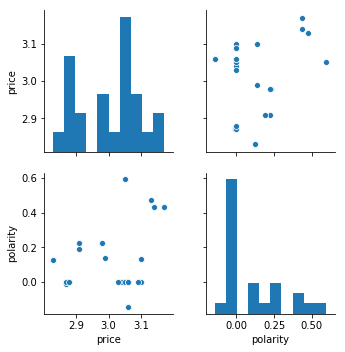

In [16]:
sns.pairplot(TM)

In [17]:
covariance = TM.cov()
covariance

,price,polarity
price,0.010082,0.006352
polarity,0.006352,0.035270


In [18]:
correlation= TM.corr()
correlation

,price,polarity
price,1.000000,0.336844
polarity,0.336844,1.000000


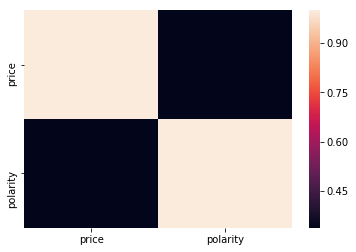

In [19]:
sns.heatmap(correlation)